In [1]:
from reidemeister_moves import *

In [6]:
# %pip install "regina>=7.0"
import regina

# Khovanov Homology of Non-Orientable Surfaces

TODO: 
- Write functions for applying reidemeister moves
- Write function for band attachment

In [24]:
rl = regina.Link.fromPD(K.pd_code())
strand = rl.components()[0]
rl_prime = regina.Link.withR1(strand,0,1)

K_prime = Link(rl_prime.pd())

AttributeError: type object 'regina.engine.Link' has no attribute 'withR1'

In [12]:
rl

<regina.Link: 6-crossing knot: +-++-+ ( ^3 _0 ^2 _1 ^4 _2 ^0 _3 ^5 _4 ^1 _5 )>

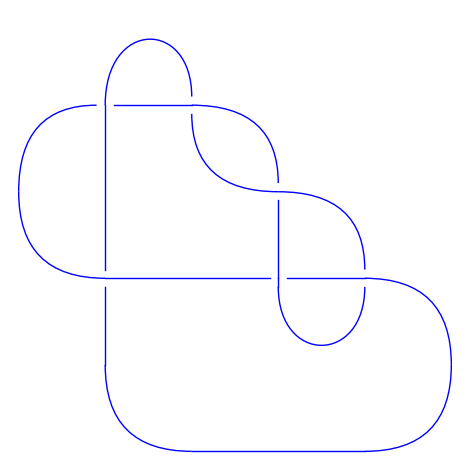

In [9]:
K = KnotInfo.K6_1.link()
K.plot()

In [ ]:
K_prime = R1(K,1)
K_prime.plot()

In [ ]:
Link([[1, 7, 2, 6],
 [3, 10, 4, 11],
 [5, 3, 6, 2],
 [7, 1, 8, 12],
 [9, 4, 10, 5],
 [11, 9, 12, 8],
 [13, , 14, ]).plot()

In [ ]:
K_prime = Link(K.pd_code() + [[13, 14, 14, 15], [15])

In [ ]:
kh = K.khovanov_homology()
kh

In [ ]:
from sage.homology.homology_group import HomologyGroup
HomologyGroup(1,ZZ,[2])

In [ ]:
HomologyGroup(1,ZZ)

In [ ]:
def kh_coeffs(hom):
    hgrads = hom.keys()
    qgrads = {x
             for c in hom.keys()}
    min_hgrad, max_hgrad = min(hom.keys()), max(hom.keys())
    min_qgrad, max_qgrad = min([min(cs.keys()) for cs in hom.values()]), max([max(cs.keys()) for cs in hom.values()])

    coeffs = [[hom[h][i] if i in hom[h].keys() else 0 for i in range(min_qgrad, max_qgrad+1)] for h in hom.keys()]
    coeffs.insert(0, list(range(min_qgrad,max_qgrad+1)))
    for h, (i, row) in zip(['h\\setminus q'] + list(hom.keys()), enumerate(coeffs)):
        coeffs[i] = [h] + row
    
    kh_table = table(coeffs, header_row=True, header_column=True)
    return latex(kh_table)

In [ ]:
kh_coeffs(kh)

$$
\begin{tabular}{l|lllllll}
h\q & $-2$ & $-1$ & $0$ & $1$ & $2$ & $3$ & $4$ \\ \hline
$-5$ & $\ZZ$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-3$ & $0$ & $C_{2}$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-1$ & $0$ & $\ZZ$ & $\ZZ \times \ZZ$ & $0$ & $0$ & $0$ & $0$ \\
$1$ & $0$ & $0$ & $\ZZ$ & $\ZZ \times C_{2}$ & $0$ & $0$ & $0$ \\
$3$ & $0$ & $0$ & $0$ & $\ZZ$ & $C_{2}$ & $0$ & $0$ \\
$5$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ & $\ZZ$ & $0$ \\
$7$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $C_{2}$ \\
$9$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ \\
\end{tabular}
$$

In [ ]:
def normal_euler_num(D, D_prime):
    return D_prime.writhe() - D.writhe()

In [ ]:
K.writhe()